# Imports

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import seaborn as sns

---

In [9]:
train_installs

,cantidad_instalaciones_installs,tiempo_ultima_instalacion_hasta_fin_ventana,cantidad_aplicaciones_diferentes_installs,cantidad_apariciones_en_ventana_auctions,apariciones_hora_2_a_6_auctions,apariciones_hora_6_a_11_auctions,apariciones_hora_11_a_14_auctions,apariciones_hora_14_a_18_auctions,apariciones_hora_18_a_23_auctions,apariciones_hora_23_a_2_auctions,...,apariciones_en_dia_1_events,apariciones_en_dia_2_events,apariciones_en_dia_3_events,promedio_eventos_por_dia_events,cantidad_realizaciones_evento_mas_frecuente_events,cantidad_eventos_top_events,tiempo_desde_hora_mas_frecuente_hasta_00_events,cantidad_eventos_con_wifi_events,cantidad_eventos_sin_wifi_events,target
device_id,,,,,,,,,,,,,,,,,,,,,
4432995619177048534,1,259198.440,1,67.0,0.0,0.0,2.0,19.0,25.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259200.000
5904733559638204455,1,259198.149,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259200.000
896373747754111825,2,259190.842,1,29.0,0.0,0.0,0.0,1.0,19.0,9.0,...,8.0,NaN,NaN,8.000000,4.0,2.0,0.0,8.0,NaN,259200.000
3399210824535017892,1,259194.411,1,17.0,1.0,0.0,0.0,7.0,6.0,3.0,...,NaN,NaN,3.0,3.000000,10.0,1.0,10800.0,3.0,NaN,259200.000
1541425881979513687,1,259193.205,1,26.0,0.0,0.0,0.0,0.0,0.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259200.000
8942039642364169230,1,259191.006,1,4.0,2.0,0.0,0.0,1.0,1.0,0.0,...,21.0,NaN,NaN,21.000000,12.0,1.0,50400.0,21.0,NaN,259200.000
6061394227238904841,2,259168.606,1,168.0,118.0,0.0,0.0,0.0,0.0,50.0,...,15.0,NaN,NaN,15.000000,28.0,1.0,0.0,15.0,NaN,259200.000
681488082455723993,1,259187.305,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259200.000
2523223190175071839,2,259182.041,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,NaN,NaN,9.000000,13.0,1.0,0.0,NaN,9.0,259200.000


# Carga de datos

# Modelo

In [2]:
train_auctions = pd.read_csv("../features/entrenar_auctions_final.csv", index_col=0)

/opt/anaconda/3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
train_installs = pd.read_csv("../features/entrenar_installs_final.csv", index_col=0)

In [7]:
X, y = train_auctions.iloc[:,:-1], train_auctions.iloc[:,-1]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=0)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [8]:
space = {
        'n_estimators': hp.choice('n_estimators', np.arange(100, 500+1)),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        'max_depth':  hp.choice('max_depth', np.arange(1, 9, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 0.5, 6, 1),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'eval_metric': 'rmse',
        'obj': 'reg:squarederror',
        'nthread': 6,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
}


def objective(space):
    model = xgb.train(space, dtrain,evals=[(dtest, "test"), (dtrain, "train")], verbose_eval=False, )
    pred = model.predict(dtest)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    #print("RMSE: {}".format(rmsee)) 

    return{'loss':rmse, 'status': STATUS_OK }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)
#100%|██████████| 100/100 [06:09<00:00,  2.87s/it, best loss: 89078.73531561601]
#{'colsample_bytree': 1.0, 'eta': 0.375, 'gamma': 0.7000000000000001, 'max_depth': 7, 'min_child_weight': 6.0, 'n_estimators': 164}

100%|██████████| 100/100 [06:09<00:00,  2.87s/it, best loss: 89078.73531561601]
{'colsample_bytree': 1.0, 'eta': 0.375, 'gamma': 0.7000000000000001, 'max_depth': 7, 'min_child_weight': 6.0, 'n_estimators': 164}


# Que pasa si armo un modelo con datos uniformes

In [6]:
train_v1 = features_v1.merge(labels_v1, left_index=True, right_index=True)

In [7]:
train_v2 = features_v1.merge(labels_v2, left_index=True, right_index=True)

In [8]:
train_v3 = features_v1.merge(labels_v3, left_index=True, right_index=True)

In [9]:
train_v4 = features_v1.merge(labels_v4, left_index=True, right_index=True)

### Nos quedamos con train_v4 que es el mas reciente, y le agregamos datos de las ventanas anteriores

In [38]:
train_uniforme = train_v4.append(train_v3.loc[(train_v3["target"] > 25920) & (train_v3["target"] < 233280)])

In [39]:
train_uniforme = train_uniforme.append(train_v2.loc[(train_v3["target"] > 25920) & (train_v2["target"] < 233280)])

In [40]:
train_uniforme = train_uniforme.append(train_v1.loc[(train_v3["target"] > 25920) & (train_v1["target"] < 233280)])

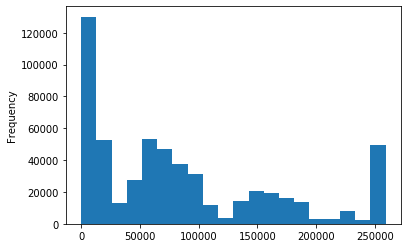

In [41]:
train_uniforme["target"].plot(kind="hist", bins=20)

In [48]:
X, y = train_uniforme.iloc[:,:-1], train_uniforme.iloc[:,-1]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=123)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

space = {
        'n_estimators': hp.choice('n_estimators', np.arange(100, 500+1)),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        'max_depth':  hp.choice('max_depth', np.arange(1, 9, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 0.5, 6, 1),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'eval_metric': 'rmse',
        'objective': 'reg:linear',
        'nthread': 6,
        'silent': 1,
        'seed': 123
}


def objective(space):
    model = xgb.train(space, dtrain,evals=[(dtest, "test")], verbose_eval=False)
    pred = model.predict(dtest)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    #print("RMSE: {}".format(rmsee)) 

    return{'loss':rmse, 'status': STATUS_OK }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print(best)
#100%|██████████| 100/100 [02:39<00:00,  1.28s/it, best loss: 76914.3391598095]
#{'colsample_bytree': 0.9, 'eta': 0.4, 'gamma': 0.55, 'max_depth': 4, 'min_child_weight': 2.0, 'n_estimators': 260}b

NameError: name 'train_uniforme' is not defined

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

X, y = train_uniforme.iloc[:,:-1], train_uniforme.iloc[:,-1]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=123)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

#model = xgb.train(space, dtrain,evals=[(dtest, "test")], verbose_eval=False)


cross = xgb.cv({'colsample_bytree': 0.9, 'eta': 0.4, 'gamma': 0.55, 'max_depth': 4, 'min_child_weight': 2.0, 'n_estimators': 260, 'silent' : 1}, dtrain, 5000, nfold=10, early_stopping_rounds=20, verbose_eval=1)

[0]	train-rmse:93704.8+25.5939	test-rmse:93720.5+314
[1]	train-rmse:83591.7+54.9959	test-rmse:83626.1+277.691
[2]	train-rmse:79511.3+45.4497	test-rmse:79566.3+232.713
[3]	train-rmse:77935.7+27.3626	test-rmse:78004.1+210.95
[4]	train-rmse:77322.4+23.8933	test-rmse:77400.5+202.94
[5]	train-rmse:77076.2+23.0776	test-rmse:77166.7+199.68
[6]	train-rmse:76964.1+22.5129	test-rmse:77066.1+196.728
[7]	train-rmse:76907.6+22.5746	test-rmse:77018+197.455
[8]	train-rmse:76870.4+21.2309	test-rmse:76989.6+196.311
[9]	train-rmse:76841+20.0653	test-rmse:76971.3+197.487
[10]	train-rmse:76817.8+20.3018	test-rmse:76957.2+196.584
[11]	train-rmse:76800.2+20.1705	test-rmse:76950.9+196.725
[12]	train-rmse:76782.7+19.74	test-rmse:76942.1+195.655
[13]	train-rmse:76765.7+19.9961	test-rmse:76933+194.664
[14]	train-rmse:76751.2+20.2278	test-rmse:76928.8+194.555
[15]	train-rmse:76738+20.5251	test-rmse:76924.2+193.592
[16]	train-rmse:76726.8+21.3959	test-rmse:76924.8+191.047
[17]	train-rmse:76713.8+21.975	test-rmse:

In [74]:
cross.mean()

train-rmse-mean    78071.483807
train-rmse-std        24.246825
test-rmse-mean     78213.746271
test-rmse-std        207.770242
dtype: float64

# Catboost

In [51]:
import numpy as np
from catboost import Pool, CatBoostRegressor
# initialize data
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.33, random_state=0)



In [52]:
# initialize Pool
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_train, y_train)

In [53]:
# specify the training parameters 
model = CatBoostRegressor(loss_function='RMSE', iterations=500)
#train the model
model.fit(train_pool, eval_set=test_pool)
# make the prediction using the resulting model

0:	learn: 156078.9606117	test: 156078.9606117	best: 156078.9606117 (0)	total: 207ms	remaining: 1m 43s
1:	learn: 153018.3771697	test: 153018.3771697	best: 153018.3771697 (1)	total: 328ms	remaining: 1m 21s
2:	learn: 150081.5695946	test: 150081.5695946	best: 150081.5695946 (2)	total: 465ms	remaining: 1m 17s
3:	learn: 147260.4273237	test: 147260.4273237	best: 147260.4273237 (3)	total: 584ms	remaining: 1m 12s
4:	learn: 144565.0665626	test: 144565.0665626	best: 144565.0665626 (4)	total: 703ms	remaining: 1m 9s
5:	learn: 141966.3896120	test: 141966.3896120	best: 141966.3896120 (5)	total: 817ms	remaining: 1m 7s
6:	learn: 139465.3112988	test: 139465.3112988	best: 139465.3112988 (6)	total: 933ms	remaining: 1m 5s
7:	learn: 137069.3522990	test: 137069.3522990	best: 137069.3522990 (7)	total: 1.06s	remaining: 1m 5s
8:	learn: 134776.4711255	test: 134776.4711255	best: 134776.4711255 (8)	total: 1.21s	remaining: 1m 5s
9:	learn: 132574.2680657	test: 132574.2680657	best: 132574.2680657 (9)	total: 1.37s	rem

---